In [3]:
import numpy as np
import matplotlib.pyplot as plt
from aeons.endpoint import EndModel
from aeons.utils import *
from aeons.beta import *
from aeons.plotting import plot_quantiles
figsettings()

In [255]:
name, samples = get_samples('elongated_1D_simple', reduced=False)

In [256]:
model = EndModel(samples)
endpoint_true = model.true_endpoint()
logXf_true = samples.logX().iloc[endpoint_true]

In [257]:
iterations = make_iterations(endpoint_true, 25)
logXs = samples.logX().iloc[iterations]
logXfs, d_Gs = model.inferences(get_d_G_post, iterations, Nset=50)

 Iteration 5214 of 5214, d=1.0

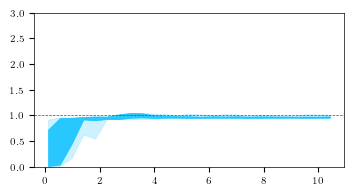

In [260]:
plot_quantiles(-logXs, d_Gs, 1, ylim=(0, 3))

In [262]:
write_to_txt(f'{data_dir}/logXfs/post/{name}.txt', [iterations, *logXfs])

In [263]:
name, samples = get_samples('elongated_1D_simple', reduced=False)
iterations, *d_Gs = read_from_txt(f'{data_dir}/d_Gs/post/{name}.txt')

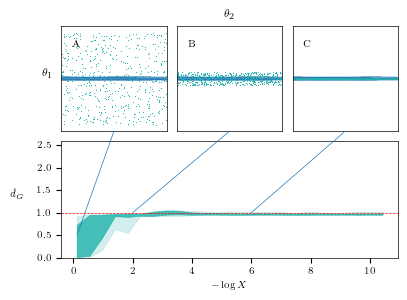

In [268]:
import matplotlib.gridspec as gridspec
from anesthetic import make_2d_axes

fig = plt.figure(figsize=(4, 3))
gs = gridspec.GridSpec(2, 3, height_ratios=[1, 1])
fig, ax0 = make_2d_axes([0, 1], diagonal=False, upper=False, subplot_spec=gs[0, 0], fig=fig, zorder=1)
fig, ax1 = make_2d_axes([0, 1], diagonal=False, upper=False, subplot_spec=gs[0, 1], fig=fig, zorder=1)
fig, ax2 = make_2d_axes([0, 1], diagonal=False, upper=False, subplot_spec=gs[0, 2], fig=fig, zorder=1)

for ax in [ax0, ax1, ax2]:
    samples.plot_2d(ax)
    ax = ax.iloc[0, 0]
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xlim(-0.5, 0.5)
    ax.set_ylim(-0.5, 0.5)

ax0.iloc[0, 0].set_ylabel('$\\theta_1$', fontsize=8, rotation=0, labelpad=10)
ax1.iloc[0, 0].set_title('$\\theta_2$', fontsize=8)
ax0.iloc[0, 0].text(-0.4, 0.3, 'A')
ax1.iloc[0, 0].text(-0.4, 0.3, 'B')
ax2.iloc[0, 0].text(-0.4, 0.3, 'C')


logXstars = [-0.12, -2, -6]
# Find index of logX closest to logXstar
logX_all = samples.logX()
ndeads = [np.argmin(np.abs(logX_all - logXstar)) for logXstar in logXstars]
for ndead, ax in zip(ndeads, [ax0, ax1, ax2]):
    points = points_at_iteration(samples, ndead)
    live_points = points.iloc[-500:]
    ax.iloc[0, 0].scatter(live_points[0], live_points[1], s=0.1, color='lightseagreen')


ax3 = fig.add_subplot(gs[1, 0:3], zorder=0)
plot_quantiles(-logXs, d_Gs, 1, ylim=(0, 2.6), ax=ax3, color='lightseagreen')
# ax3.margins(x=0)
ax3.set_xlabel('$-\\log X$')
ax3.set_ylabel('$\\hat{d}_G$', rotation=0, labelpad=15)


dims = [0.5, 1, 1]
from matplotlib.patches import ConnectionPatch
for ax, logXstar, dim in zip([ax0, ax1, ax2], logXstars, dims):
    con = ConnectionPatch(xyA=(0, -0.5), xyB=(-logXstar, dim), coordsA="data", coordsB="data",
                      axesA=ax.iloc[0, 0], axesB=ax3, color="C0", zorder=0.5)
    fig.add_artist(con)
    con.set_in_layout(False)

fig.tight_layout()

# Diagonal Gaussian

In [24]:
name, samples = get_samples('elongated_6D_close', reduced=False)
model = EndModel(samples)
endpoint_true = model.true_endpoint()
logXf_true = samples.logX().iloc[endpoint_true]

In [27]:
iterations = make_iterations(endpoint_true, 25)
logXs = samples.logX().iloc[iterations]
logXfs, d_Gs = model.inferences(get_d_G_post, iterations, Nset=50)

 Iteration 16098 of 16098, d=6.0

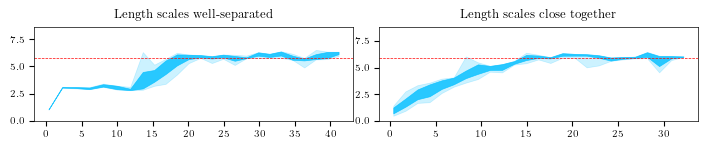

In [36]:
chains = ['correlated_6d', 'elongated_6D_close']
titles = ['Length scales well-separated', 'Length scales close together']
fig, axs = plt.subplots(1, 2, figsize=(7, 1.5))

for chain, title, ax in zip(chains, titles, axs):
    name, samples = get_samples(chain)
    model = EndModel(samples)
    endpoint_true = model.true_endpoint()
    logXf_true = samples.logX().iloc[endpoint_true]
    
    iterations, *d_Gs = read_from_txt(f'{data_dir}/d_Gs/post/{name}.txt')
    logXs = samples.logX().iloc[iterations]
    plot_quantiles(-logXs, d_Gs, samples.d_G(), ylim=(0, 1.5), ax=ax)
    ax.set_title(title)

fig.tight_layout()